In [0]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot



In [0]:
def computeCost(X, Y, theta, lmda):
    m = Y.size  
    J = 0
    h=np.dot(X,theta)
    J=(1/(2*m))*(sum((h-Y)**2))
    k=((lmda/(2*m))*sum((theta)**2))
    J=J+k
    return J

In [0]:

def gradientDescent(x, y, theta, alpha, num_iters,lumda):
    m = y.size
    J_history = []
    alphabym=alpha/m
    for i in range(num_iters):
        H=np.dot(x,theta)
        theta = ( theta * (1-((alpha*lumda)/m)) ) - ( (alpha/m)* np.dot(x.T,H-y) )
        # save the cost J in every iteration
        J_history.append(computeCost(x,y,theta,lumda))
    return theta, J_history



# def gradientDescent(x, y, theta, alpha, num_iters,lumda):
#     m = y.shape[0]
#     theta = theta.copy()
#     J_history = []
    
#     for i in range(num_iters):
#         h = np.dot(x, theta)                
#         theta = theta - (alpha*(1.0 / m) * (((np.dot(np.transpose(x), (h - y)))) + lumda*theta))
#         J_history.append(computeCost(x,y,theta,lumda))
    
#     return theta, J_history




In [0]:
 def  featureNormalize(X):
    
      X_norm = X.copy()

      mu = np.mean(X)
      X_norm = X - mu

      sigma = np.std(X_norm)
      X_norm = X_norm / sigma
   
      return X_norm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


22974159648.764507
53203798241.7761
190007238428.19678


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


23545223707.10858
89045843662.73126
200722885761.24374


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


24956055360.914932
54297462213.17472
206998297620.2681


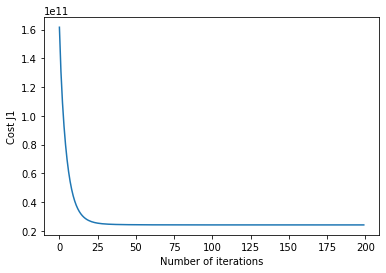

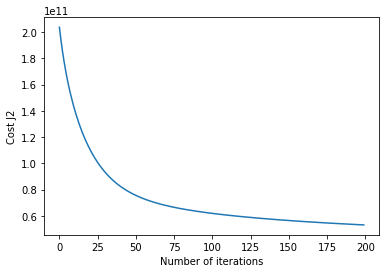

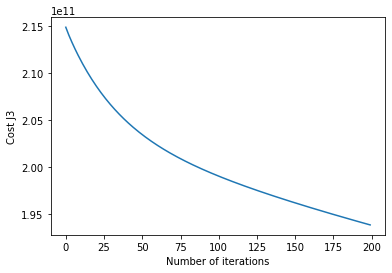

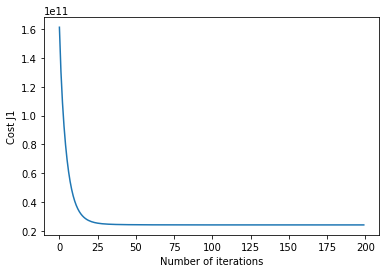

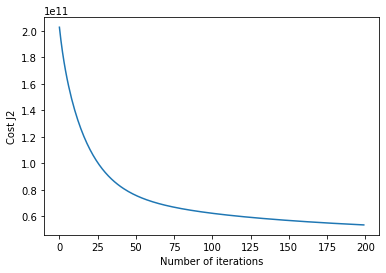

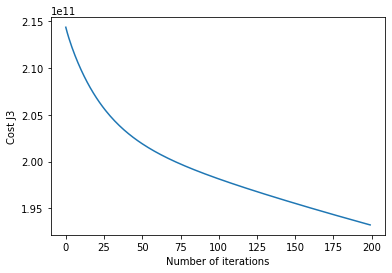

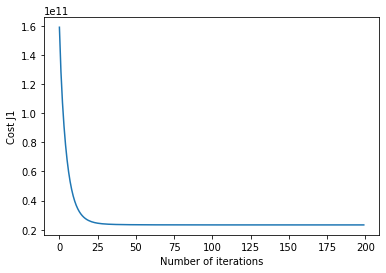

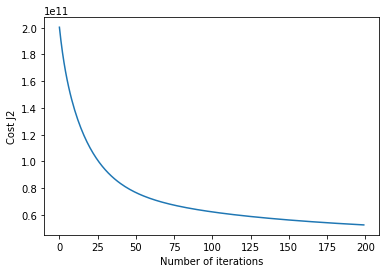

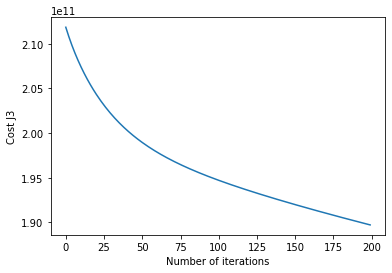

In [10]:
data=pd.read_csv('/content/house_data_complete (1).csv')
data=data.drop(['id','date','zipcode','lat','long'],1)
data=round(data)
data=data.dropna()

for j in range(3):
    data=data.sample(frac=1, replace=False)
    data_x = data.copy()
    Y=data['price']
    ##################
    sizeofrows=data_x.shape[0]
    training=data_x[:(round(sizeofrows*0.6))]
    Y1=training['price']
    training=training.drop(['price'],1)
    crossvalidationlength=round(sizeofrows*0.6+1+sizeofrows*0.2)
    crossvalidation=data_x[(round(sizeofrows*0.6)+1):crossvalidationlength]
    Y2=crossvalidation['price']
    crossvalidation=crossvalidation.drop(['price'],1)
    for i in range(crossvalidation.shape[1]):
        crossvalidation.iloc[:,i] = featureNormalize(crossvalidation.iloc[:,i])
    crossvalidation= np.concatenate([np.ones((crossvalidation.shape[0],1)), crossvalidation], axis=1)
    test=data[(crossvalidationlength):]
    Y3=test['price']
    test=test.drop(['price'],1)
    for i in range(test.shape[1]):
        test.iloc[:,i] = featureNormalize(test.iloc[:,i])
    test= np.concatenate([np.ones((test.shape[0],1)), test], axis=1)
    data_x=data_x.drop(['price'],1)
    training =(training - training.mean())/training.std()
    training= np.concatenate([np.ones((training.shape[0],1)), training], axis=1)
    theta=np.zeros(training.shape[1])
    lumda=np.array([0,0.01,0.02,0.04,0.016])
    h1=np.zeros(lumda.size)
    h2=np.zeros(lumda.size)
    h3=np.zeros(lumda.size)
    for i in range(lumda.size):
        iterations = 200
        lmda=lumda[i]
        theta1, J_history1 = gradientDescent(training ,Y1, theta, 0.1, iterations,lmda)
    
        U=training**2
        theta2, J_history2 = gradientDescent(U ,Y1, theta, 0.001, iterations,lmda)

        w=(training)**3
        theta3, J_history3 = gradientDescent(w ,Y1, theta, 0.0001, iterations,lmda)
        h11=np.dot(crossvalidation,theta1)
        h12=np.dot(crossvalidation,theta2)
        h13=np.dot(crossvalidation,theta3)
        Uu=crossvalidation**2
        ww=crossvalidation**3
        h1[i]=computeCost(crossvalidation, Y2, theta1, 0)
        h2[i]=computeCost( Uu, Y2, theta2, 0)
        h3[i]=computeCost(ww, Y2, theta3, 0)
    lumdain1=np.argmin(h1) 
    lumdain2=np.argmin(h2) 
    lumdain3=np.argmin(h3) 
    cc=lumda[lumdain1]
    re=lumda[lumdain2]
    ttr=lumda[lumdain3]
    theta1, J_history1 = gradientDescent(training ,Y1, theta, 0.1, iterations,cc)

    U=training**2
    theta2, J_history2 = gradientDescent(U ,Y1, theta, 0.001, iterations,re)

    w=(training)**3
    theta3, J_history3 = gradientDescent(w ,Y1, theta, 0.000001, iterations,ttr)
    
    ##########

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history1)), J_history1)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J1')

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history2)), J_history2)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J2')

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history3)), J_history3)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J3')
    ff=test**2
    fff=test**3
    ydash1=np.dot(test,theta1)
    ydash2=np.dot(ff,theta2)
    ydash3=np.dot(fff,theta3)
    m=Y3.size
    Jj1 = (np.sum(np.square(ydash1 - Y3))) / (2 * m)
    # Jj1=(1/(2*m))*(sum((ydash1-Y3)**2))
    Jj2 = (np.sum(np.square(ydash2 - Y3))) / (2 * m)
    # Jj2=(1/(2*m))*(sum((ydash2-Y3)**2))
    Jj3=(1/(2*m))*(sum((ydash3-Y3)**2))
###### 3 cost function and the pridection of test
    # print(ydash1)
    # print(ydash2)
    # print(ydash3)
    print(Jj1)
    print(Jj2)
    print(Jj3)
    


Text(0.5, 0, 'prices')

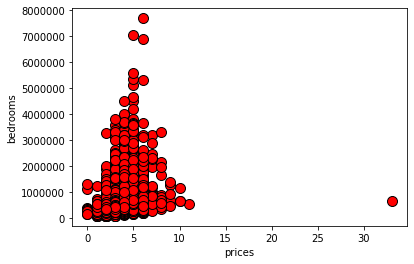

In [0]:
pyplot.plot(data['bedrooms'], Y, 'ro', ms=10, mec='k')
pyplot.ylabel('bedrooms')
pyplot.xlabel('prices')

Text(0.5, 0, 'prices')

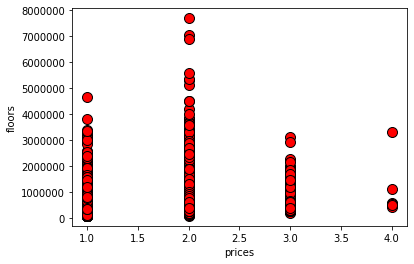

In [11]:
pyplot.plot(data['floors'], Y, 'ro', ms=10, mec='k')
pyplot.ylabel('floors')
pyplot.xlabel('prices')